In [1]:
import filenistview 
import random
import pickle
import numpy as np
import sys

import matplotlib.pyplot as plt

# load in the datasets
# Mat1
#nvldata = filenistview.FileHandlerNVL.load("BSCOData/OPT35K/70824A05 NVL cropped.nvl")

# Mat3
nvldata = filenistview.FileHandlerNVL.load("BSCOdata/UD32K/1016B012 dIdV, cropcorner=(112,7), linesubtract, filtered N=5.nvl")

# set up the data for usage
nvldata = np.asarray(nvldata)
norm_data = nvldata / np.max(nvldata)

energies = nvldata.shape[1]
rows = nvldata.shape[2]
columns = nvldata.shape[3]

nvl_modified = np.zeros((energies, rows, columns))

for i in range(rows):
    for j in range(columns):
        nvl_modified[:,i,j] = norm_data[0,:,i,j]

FileHandler <class 'filenistview.FileHandlerNVL'>: Load file BSCOdata/UD32K/1016B012 dIdV, cropcorner=(112,7), linesubtract, filtered N=5.nvl
IDL Save file is compressed
 -> expanding to C:\Users\elw81\AppData\Local\Temp\tmp14m89f5b.sav
--------------------------------------------------
Date: Wed Mar 30 11:45:54 2011
User: Jenny
Host: JENNY-TABLET
--------------------------------------------------
Format: 9
Architecture: x86
Operating System: Win32
IDL Version: 7.1
--------------------------------------------------
Successfully read 14 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type HEAP_HEADER
 - 7 are of type HEAP_DATA
 - 1 are of type VERSION
 - 2 are of type VARIABLE
 - 1 are of type NOTICE
--------------------------------------------------
Available variables:
 - savestructure [<class 'numpy.recarray'>]
 - saveversion [<class 'numpy.float32'>]
--------------------------------------------------


In [1]:
# gapmap imports

# dataset 1 
#temp = filenistview.FileHandlerNVI.load("BSCOData/OPT35K/drift-corrected 70824A05_Eric_CombinedSmoothedGapMap.NVI")

# dataset 3 
temp = filenistview.FileHandlerNVI.load("BSCOData/UD32K/1016B012 gapmap, simple posE max.nvi")

gapmap = temp[0]
gapmap.shape

In [4]:
### needs modifying for different datasets
# mat = 1
# dim = 468
# folder_name = "OPT11_10"

mat = 3
dim = 400
folder_name = "UD11_11" # must be unique for the run 
### needs modifying

In [5]:
import math
import scipy.fft 

# method I'm using to do FFTs
def ffourier(orig):
    k = scipy.fft.fft2(orig.astype(np.float))
    k = scipy.fft.fftshift(k)
    return k

In [6]:
# def shoelacearea(vertices_ordered):
#     partial_sum = 0
#     for i in range(len(vertices_ordered)-1):
#         partial_sum += vertices_ordered[i][0]*vertices_ordered[i+1][1] - vertices_ordered[i+1][0]*vertices_ordered[i][1]
#         partial_sum += vertices_ordered[-1][0]*vertices_ordered[0][1] - vertices_ordered[0][0]*vertices_ordered[-1][1]
#     area = 0.5 * abs(partial_sum)
#     return area

# methods I'm using to sort the vertices of the Voronoi cells and calculate their areas
def PolygonArea(corners):
    n = len(corners) # of corners
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += corners[i][0] * corners[j][1]
        area -= corners[j][0] * corners[i][1]
    area = abs(area) / 2.0
    return area

def PolygonSort(corners):
    n = len(corners)
    cx = float(sum(x for x, y in corners)) / n
    cy = float(sum(y for x, y in corners)) / n
    cornersWithAngles = []
    for x, y in corners:
        an = (np.arctan2(y - cy, x - cx) + 2.0 * np.pi) % (2.0 * np.pi)
        cornersWithAngles.append((x, y, an))
    cornersWithAngles.sort(key = lambda tup: tup[2])
    return list (starmap(lambda x, y, an: (x, y), cornersWithAngles))

from matplotlib import path

# method that tells me which points are in a particular polygon - "listofallpoints" will be defined later as a global variable
def inpolygon(polygon):
    p = path.Path(polygon)
    return p.contains_points(listofallpoints)

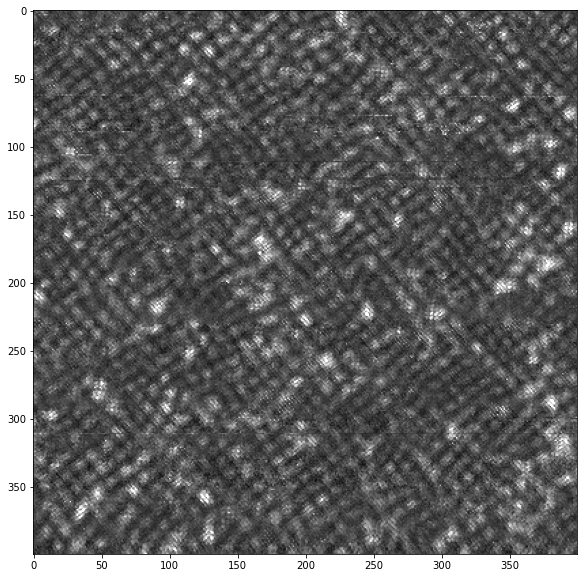

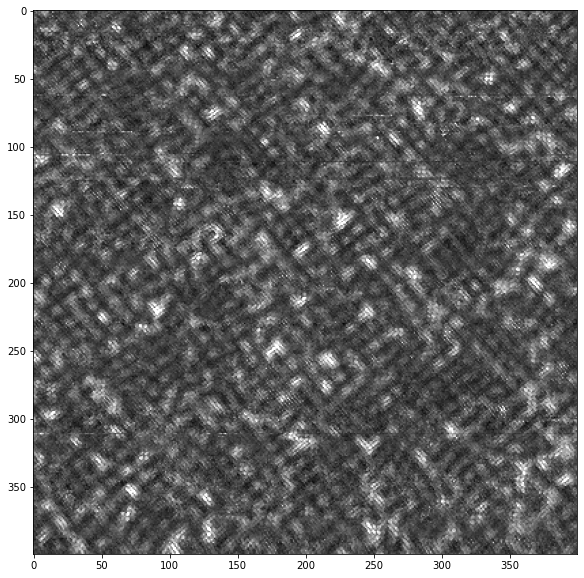

In [181]:
# plotting the 10mV layer; index 18 corresponds to +10mV for this set
fig = plt.figure(figsize = (10, 10))
plt.imshow(nvl_modified[18,:,:], cmap = 'gray', vmax = 0.5)
plt.show()
fig = plt.figure(figsize = (10, 10))
plt.imshow(nvl_modified[22,:,:], cmap = 'gray', vmax = 0.5)

-492.36488536055714
18336.078949071467


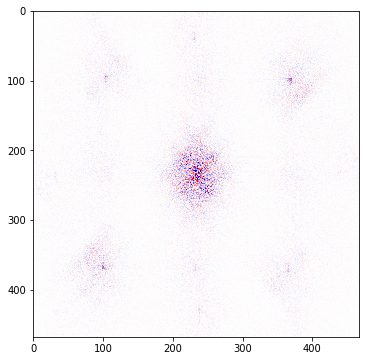

In [6]:
# doing the FFT
sea3 = nvl_modified[18,:,:]
sea3 = ffourier(sea3)
print(np.min(np.real(sea3)))
print(np.max(np.real(sea3)))
fig = plt.figure(figsize = (6, 6))
plt.imshow(np.real(sea3), cmap='bwr', vmin = -300, vmax = 300)

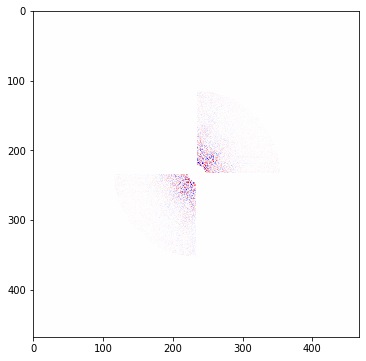

In [7]:
# masking the FFT
fsea3 = np.zeros((rows, columns), dtype = complex)
for i in range(sea3.shape[0]):
    for j in range(sea3.shape[1]):
        half = rows/2
        x = ((i-half)**2) + ((j-half)**2)
       # x2 = ((i-210)**2) + ((j-260)**2)
        if (i < half and j > half):
            if (x > 150 and x < 14000):
                fsea3[i,j] = sea3[i,j]
        if (i > half and j < half):
            if (x > 150 and x < 14000):
                fsea3[i,j] = sea3[i,j]
        
fig = plt.figure(figsize=(6,6))
plt.imshow(np.real(fsea3), cmap='bwr', vmin = -300, vmax = 300)

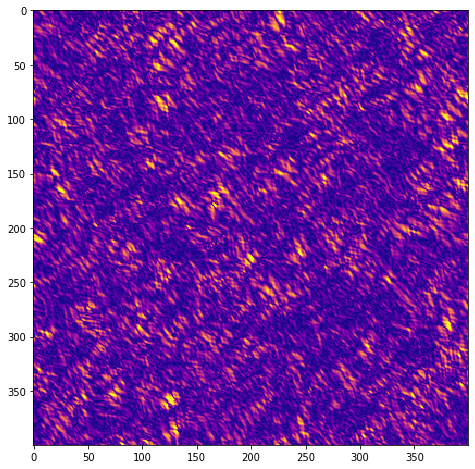

In [140]:
# doing the iFFT
k = scipy.fft.ifftshift(fsea3)
k = scipy.fft.ifft2(k)

fig = plt.figure(figsize=(8,8))
plt.imshow(np.abs(k), cmap = 'plasma', vmax = 0.15)

In [134]:
pickle.dump(np.abs(k), open("yUD10mV.pickle", "wb"))

In [9]:
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

In [2]:

orig = pickle.load(open("IntegralOPT", "rb"))


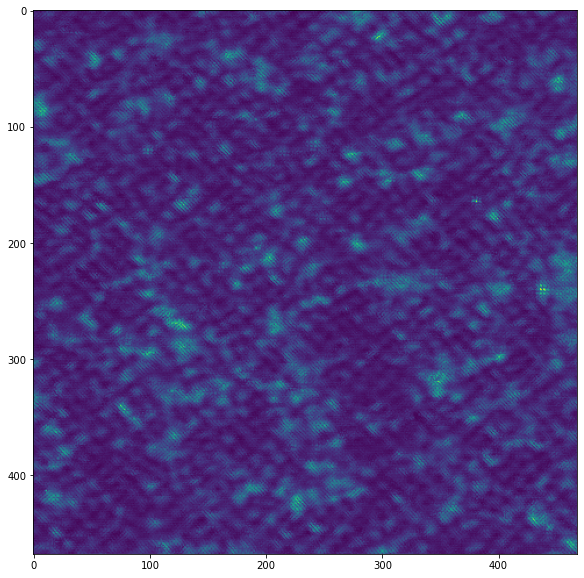

In [4]:
fig = plt.figure(figsize=(10,10))
plt.imshow(orig)


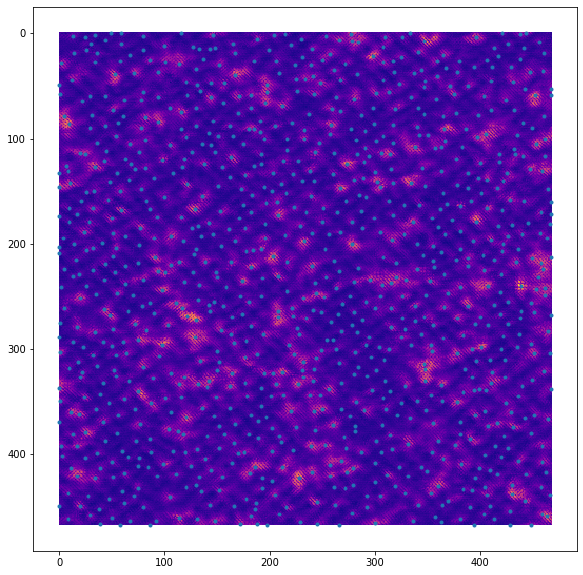

In [427]:
# SciPy finding points 
#orig = nvl_modified[18,:,:]
orig = pickle.load(open("IntegralOPT.pickle", "rb"))

threshold = 0.05*np.max(orig)
s = 10

results_max = filters.maximum_filter(orig, size = s)
maxima = (orig == results_max)
results_min = filters.minimum_filter(orig, size = s)
diff = (results_max - results_min > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)
x, y = [], []
for dx, dy in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2
    y.append(y_center)

fig = plt.figure(figsize=(10,10))
plt.imshow(orig, cmap = 'plasma')
plt.scatter(y, x, marker = ".")

pickle.dump(x, open(folder_name + "/SciXCoords.pickle", "wb"))
pickle.dump(y, open(folder_name + "/SciYCoords.pickle", "wb"))

## Starting Voronoi

1081


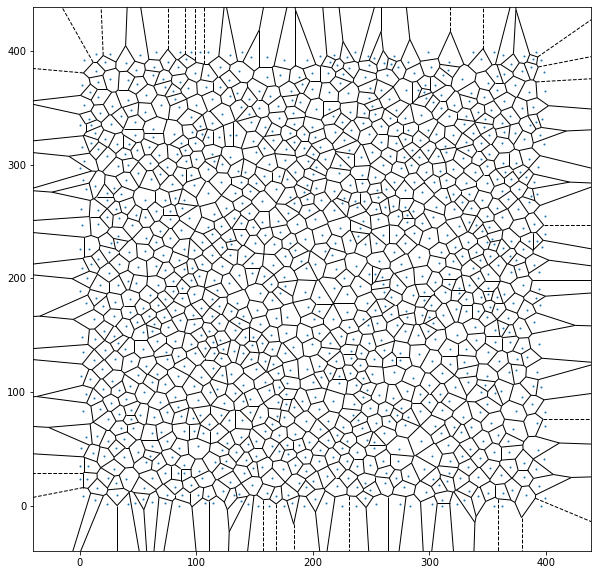

In [17]:
# plotting initial voronoi diagram

from scipy.spatial import Voronoi, voronoi_plot_2d

# this is my brute force way of making a list of all combinations of coordinates for use in the inpolygon() method
listofallpoints = []

for i in range(dim):
    for j in range(dim):
        listofallpoints.append([i,j])

# xtest = [p[0] for p in singleslist]
# ytest = [p[1] for p in singleslist]

xtest = pickle.load(open(folder_name + "/SciXCoords.pickle", "rb"))
ytest = pickle.load(open(folder_name + "/SciYCoords.pickle", "rb"))

# x and y are from the SciPy cell above
# xtest = x
# ytest = y

merged_single = list(zip(xtest, ytest))
vor = Voronoi(merged_single)
print(len(vor.regions))
fig = voronoi_plot_2d(vor, show_vertices = False, point_size=2)

fig.set_size_inches((10,10))
plt.show()

In [15]:
from scipy.spatial import Voronoi, voronoi_plot_2d


In [184]:
# making a list of arrays - each array corresponds to one cell and contains that cell's vertices

verticelist = []

for i in range(len(vor.regions)):
    x = []
    if (len(vor.regions[i]) == 0):
        print("yes") # vor.regions always has one empty (just how the package was coded), so I don't include that
        continue
    for f in range(len(vor.regions[i])):
        if ((vor.regions[i][f]) == -1): continue
        else: x.append(vor.vertices[(vor.regions[i][f])])
    verticelist.append(np.array(x))

print(len(verticelist))

#pickle.dump(verticelist, open(folder_name + "/VerticeList.pickle", "wb"))

yes
1080


In [185]:
# I first sort the vertices and then calculate the area of the polygon for each cell 

from itertools import starmap
area = []

for i in range(len(verticelist)):
    if (len(verticelist[i]) == 0):
        area.append(np.array(0))
        print(i)
    else: area.append(PolygonArea(PolygonSort(verticelist[i])))

pickle.dump(area, open(folder_name + "/AreaList.pickle", "wb"))

In [13]:
# percentiles for the area ranks, ex a1 = 92 means 92nd percentile, and I always exclude the cells above the a1 percentile 
# because those are the ones on the borders

#a1 = 92 # mat 1
a1 = 92 # old mat 3
a = 85
b = 75
c = 55
d = 30

# methods I use to color my Voronoi diagram
def give_color(area, x):
    if (x >= np.percentile(area, a1)):
        color_assigned = 'red'
#     elif (x >= np.percentile(area, a)):
#         color_assigned = 'pink'
    elif(x >= np.percentile(area, b)):
        color_assigned = 'orange'
    elif(x >= np.percentile(area, c)):
        color_assigned = 'cyan'
    elif(x >= np.percentile(area, d)):
        color_assigned = 'green'
    elif(x >= 0):
        color_assigned = 'purple'
    return color_assigned

def color_amp(amp_ex, x):
# this is for regular amplitude

#     if (amp_ex[x] >= np.percentile(amp_ex, 80)):
#         color_assigned = 'red'
#     elif(amp_ex[x] >= np.percentile(amp_ex, 60)):
#         color_assigned = 'orange'
#     elif(amp_ex[x] >= np.percentile(amp_ex, 40)):
#         color_assigned = 'cyan'
#     elif(amp_ex[x] >= np.percentile(amp_ex, 20)):
#         color_assigned = 'green'
#     else:
#         color_assigned = 'purple'
    
#     return color_assigned

# this part is used for ampX and ampY - put in amp_subtracted

    if (amp_ex[x] >= np.percentile(amp_ex, 80)):
        color_assigned = 'red'
    elif(amp_ex[x] >= np.percentile(amp_ex, 60)):
        color_assigned = 'lightcoral'
    elif(amp_ex[x] >= np.percentile(amp_ex, 40)):
        color_assigned = 'white'
    elif(amp_ex[x] >= np.percentile(amp_ex, 20)):
        color_assigned = 'lightskyblue'
    else:
        color_assigned = 'blue'
    
    return color_assigned

In [480]:
sub_int = pickle.load(open(folder_name + "/CSubIntNew.pickle", "rb"))

switch_sub_int = np.zeros((dim,dim))
for i in range(dim):
    for j in range(dim):
        switch_sub_int[i,j] = sub_int[j,i]

In [377]:
div_int = pickle.load(open(folder_name + "/CDivInt.pickle", "rb"))

switch_div_int = np.zeros((dim,dim))
for i in range(dim):
    for j in range(dim):
        switch_div_int[i,j] = div_int[j,i]

In [379]:
start_sub_int = pickle.load(open(folder_name + "/SubInt.pickle", "rb"))

start_switch_sub_int = np.zeros((dim,dim))
for i in range(dim):
    for j in range(dim):
        start_switch_sub_int[i,j] = start_sub_int[j,i]

In [2]:
amp_using = pickle.load(open(folder_name + "/AmpList.pickle", "rb"))
fig = voronoi_plot_2d(vor, show_points=True, show_vertices=False, point_size = 2, s=1)
fig.set_size_inches((10,10))
print(len(vor.point_region))
        
r = 299
polygon = verticelist[r]
plt.fill(*zip(*polygon), color=color_amp(amp_using, r))
plt.show()

In [471]:
switch_nvl = np.zeros((dim,dim))
for i in range(dim):
    for j in range(dim):
        switch_nvl[i,j] = nvl_modified[18, j, i]

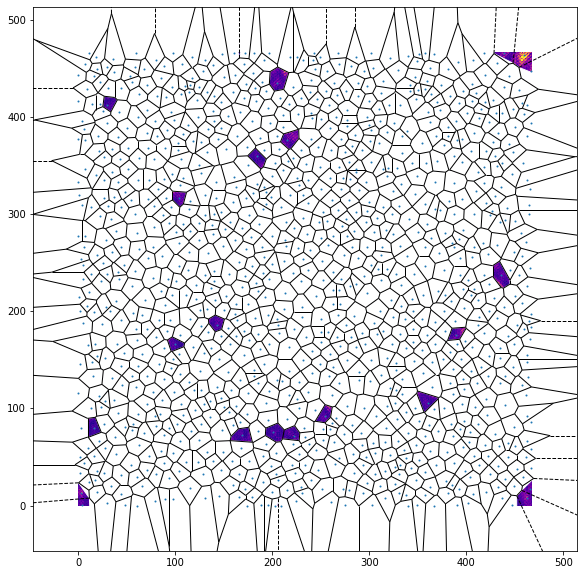

In [479]:
fig = voronoi_plot_2d(vor, show_points=True, show_vertices=False, point_size = 2, s=1)
fig.set_size_inches((10,10))
plt.imshow(switch_nvl, cmap = 'plasma', vmax = 0.4)
for r in range(len(verticelist)):
    if good_bad[r] != 0.5:
        polygon = verticelist[r]
        plt.fill(*zip(*polygon), color='white')

1080


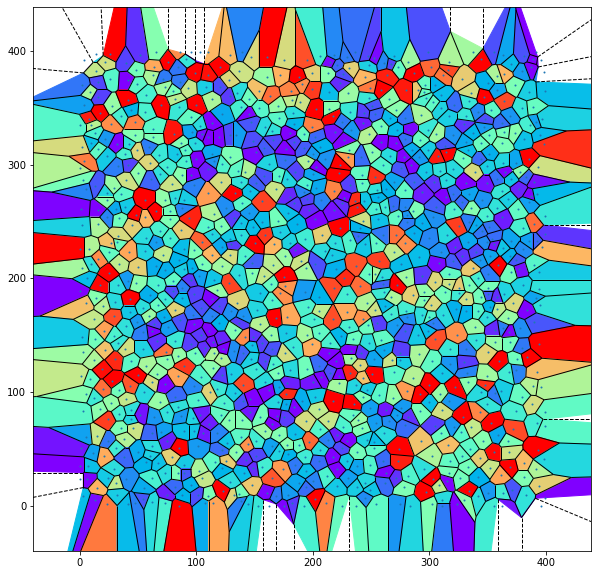

In [21]:
## plotting the Voronoi diagram with colors!

import matplotlib.cm as cm
import matplotlib as mpl

# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=np.percentile(ampX, 5), vmax=np.percentile(ampX, 95), clip=True)
mapper = cm.ScalarMappable(norm = norm, cmap=cm.rainbow)

# plot Voronoi diagram, and fill finite regions with color mapped from speed value
fig = voronoi_plot_2d(vor, show_points=True, show_vertices=False, point_size = 2, s=1)
fig.set_size_inches((10,10))
print(len(vor.point_region))
        
for r in range(len(verticelist)):
    polygon = verticelist[r]
    #plt.fill(*zip(*polygon), color=mapper.to_rgba(area[r]))
    plt.fill(*zip(*polygon), color=mapper.to_rgba(ampX[r]))
    #plt.fill(*zip(*polygon), color=give_color(area, area[r]))
    #plt.fill(*zip(*polygon), color=color_amp(amp_subtracted, r))
    #plt.fill(*zip(*polygon), color=color_amp(ampX, r))
plt.show()

In [454]:
good_bad = pickle.load(open(folder_name + "/GoodBadSplit.pickle", "rb"))

In [461]:
def good_bad_color(num):
    if num == 0:
        color = 'lightskyblue'
    elif num == 1:
        color = 'lightcoral'
    elif num == 0.5:
        color = 'green'
    elif num == 0.75:
        color = 'yellow'
    else: color = 'white'
    return color

1032


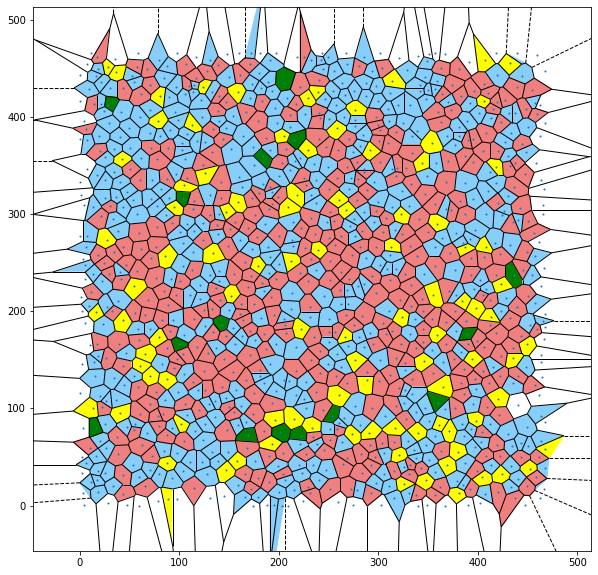

In [462]:
# plot Voronoi diagram, and fill finite regions with color mapped from speed value
fig = voronoi_plot_2d(vor, show_points=True, show_vertices=False, point_size = 2, s=1)
fig.set_size_inches((10,10))
print(len(vor.point_region))
        
for r in range(len(verticelist)):
    polygon = verticelist[r]
    #plt.fill(*zip(*polygon), color=mapper.to_rgba(amp[r]))
    #plt.fill(*zip(*polygon), color=give_color(area, area[r]))
    #plt.fill(*zip(*polygon), color=color_amp(amp_subtracted, r))
    #plt.fill(*zip(*polygon), color=color_amp(amp, r))
    plt.fill(*zip(*polygon), color=good_bad_color(good_bad[r]))
plt.show()

1080


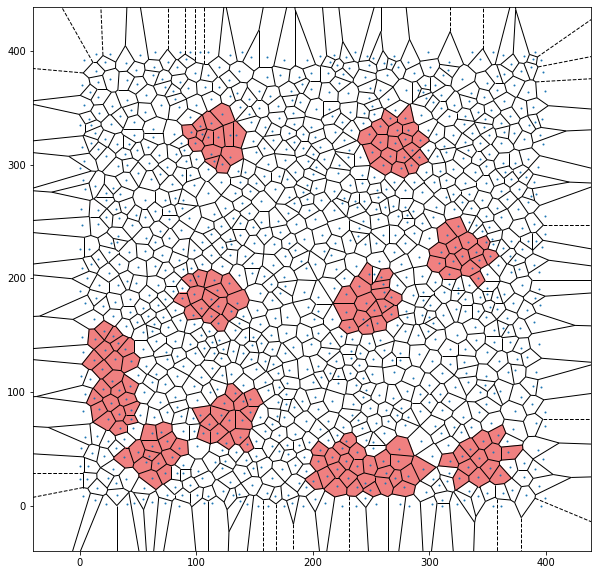

In [41]:
# plot Voronoi diagram, and fill finite regions with color mapped from speed value
fig = voronoi_plot_2d(vor, show_points=True, show_vertices=False, point_size = 2, s=1)
fig.set_size_inches((10,10))
print(len(vor.point_region))
        
for i in range(12):
    for index in (amp_test_indices[i]):
        polygon = verticelist[index]
        plt.fill(*zip(*polygon), color='lightcoral')
plt.show()

In [21]:
# amp_here = pickle.load(open("OPT11_10/AmpList.pickle", "rb"))
# print(len(amp_here))
# amp_test_indices = pickle.load(open("OPT11_10/AmpTestIndices.pickle", "rb"))
# for i in range(8):
#     print(i+1)
#     for index in (amp_test_indices[i]):
#         print(amp_here[index])

In [42]:
amp_ind = pickle.load(open(folder_name + "/AmpInd.pickle", "rb"))

In [39]:
amp_test_indices = pickle.load(open(folder_name + "/AmpTestIndices.pickle", "rb"))

In [58]:
spec_list_orderly = []
spec_list_messy = []
for i in range(12):
    if (i > 5):
        for index in (amp_test_indices[i]):
            for ind in amp_ind[index]:
                x_ind = ind[0]
                y_ind = ind[1]
                spec_list_orderly.append(nvl_modified[:, x_ind, y_ind])
    elif (i < 6):
        for index in (amp_test_indices[i]):
            for ind in amp_ind[index]:
                x_ind = ind[0]
                y_ind = ind[1]
                spec_list_messy.append(nvl_modified[:, x_ind, y_ind])

In [59]:
print(len(spec_list_orderly))
print(len(spec_list_messy))

12165
12990


In [431]:
# takes a long time to run!

# area_rank gives each pixel in the 468x468 map a rank (all the pixels inside a certain cell are given a particular area
# rank based on the cell they make up)
# area_matrix gives each pixel the area value of the cell it is contained in

area_rank = np.zeros((dim,dim))
area_matrix = np.zeros((dim,dim))

a1val = np.percentile(area, a1)
aval = np.percentile(area, a)
bval = np.percentile(area, b)
cval = np.percentile(area, c)
dval = np.percentile(area, d)

count = np.zeros(5)

for i in range(len(area)):
    if (area[i] >= a1val): continue # skipping all the border cells
# I used to do an extra partition but I don't use this anymore
    elif (area[i] >= aval and area[i] < a1val): 
        polygon_test = inpolygon(verticelist[i])
        for j in range(len(polygon_test)):
            if(polygon_test[j]):
                row = math.floor(j/dim)
                col = j % dim
                area_rank[row,col] = 5
                area_matrix[row, col] = area[i]
                count[4] += 1
    elif (area[i] >= bval):
        polygon_test = inpolygon(verticelist[i])
        for j in range(len(polygon_test)):
            if(polygon_test[j]):
                row = math.floor(j/dim)
                col = j % dim
                area_rank[row,col] = 4
                area_matrix[row, col] = area[i]
                count[3] += 1
    elif(area[i] >= cval):
        polygon_test = inpolygon(verticelist[i])
        for j in range(len(polygon_test)):
            if(polygon_test[j]):
                row = math.floor(j/dim)
                col = j % dim
                area_rank[row,col] = 3
                area_matrix[row, col] = area[i]
                count[2] += 1
    elif(area[i] >= dval):
        polygon_test = inpolygon(verticelist[i])
        for j in range(len(polygon_test)):
            if(polygon_test[j]):
                row = math.floor(j/dim)
                col = j % dim
                area_rank[row,col] = 2
                area_matrix[row, col] = area[i]
                count[1] += 1
    elif (area[i] > 0):
        polygon_test = inpolygon(verticelist[i])
        for j in range(len(polygon_test)):
            if(polygon_test[j]):
                row = math.floor(j/dim)
                col = j % dim
                area_rank[row,col] = 1
                area_matrix[row, col] = area[i]
                count[0] += 1

# count[4] is zero because I no longer use that partition/group
print('from smallest area group to largest area group', count)

from smallest area group to largest area group [46455. 52304. 49727. 29825. 23650.]


## GapMap 

In [432]:
# here I'm just getting an average area for each area rank group (including the partition I no longer use for area rank)
area_avg_per_group = np.zeros(5)
count_area_avg = np.zeros(5)

for i in range(len(area)):
    if (area[i] > a1val): continue
    elif (area[i] >= aval and area[i] < a1val):
        area_avg_per_group[4] += area[i]
        count_area_avg[4] += 1
    elif (area[i] >= bval):
        area_avg_per_group[3] += area[i]
        count_area_avg[3] += 1
    elif(area[i] >= cval):
        area_avg_per_group[2] += area[i]
        count_area_avg[2] += 1
    elif(area[i] >= dval):
        area_avg_per_group[1] += area[i]
        count_area_avg[1] += 1
    elif (area[i] > 0):
        area_avg_per_group[0] += area[i]
        count_area_avg[0] += 1
        
print('average area per group:', np.divide(area_avg_per_group, count_area_avg))

average area per group: [159.04616205 214.71501912 259.34964188 307.53587815 368.75091502]


In [3]:
# going from gap to area method

if mat == 1:
    num_groups = 14
    gap_bounds = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100]
elif mat == 3:
    num_groups = 11
    gap_bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

gaplist = np.zeros(num_groups)
full_arealist = [[] for x in range(num_groups)]
arealist = np.zeros(num_groups)
count = np.zeros(num_groups)
limit = np.percentile(area, 90)

for i in range(dim):
    for j in range(dim):
        for index in range(num_groups):
            if (area_matrix[i, j] > limit): continue
            elif (area_matrix[i, j] == 0): continue
            else:
                if (gapmap[i, j] >= gap_bounds[index] and gapmap[i, j] < gap_bounds[index+1]):
                    gaplist[index] = gaplist[index] + gapmap[i, j]
                    full_arealist[index].append(area_matrix[i, j])
                    arealist[index] = arealist[index] + area_matrix[i, j]
                    count[index] = count[index] + 1
                    
plt.scatter(np.divide(gaplist, count), np.divide(arealist, count))
plt.xlabel('Average Gap Size')
plt.ylabel('Average Area')

In [15]:
def custom_mean(lofspecs, num = 41):
    if (len(lofspecs) == 0):
        return np.zeros(num)
    lofspecs = np.array(lofspecs)
    ret_spec = np.zeros(num)
    for a in range(num):
        ret_spec[a] = np.mean(lofspecs[:, a])
    return ret_spec

def plotit(thestuff, waterfall, howmany = 41):
    if waterfall:
        plt.figure(figsize=(5,12))
        rr = 0.08
    else:
        plt.figure(figsize=(9,6))
        rr = 0

    for i in range(num_groups):
        cstr = str(i*5 + 5) + " mV"
        if len(thestuff[i]) == 0:
            continue
        plt.plot(custom_mean(thestuff[i], howmany) + (num_groups - i - 1)*rr, label = cstr)

    plt.legend(bbox_to_anchor = (0, 1), loc = 'upper right')
    plt.xticks(np.arange(0, 41, 2))
    plt.grid(b= True)
    plt.show()

In [57]:
def print_lengths(dct):
    for key in dct.keys():
        print(key, len(dct[key]))

In [132]:
adjgapmap = recongapmap

In [136]:
np.shape(adjgapmap)

(400, 400)

In [152]:
if mat == 1:
    num_groups = 14
    gap_bounds = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100]
elif mat == 3:
    num_groups = 20
    gap_bounds = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]

gaplist = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: []}

for i in range(dim):
    for j in range(dim):
        for index in range(num_groups):
             if (adjgapmap[i, j] >= gap_bounds[index] and adjgapmap[i, j] < gap_bounds[index+1]):
                    gaplist[index].append(nvl_modified[:, i, j])

In [151]:
print(aa, bb, cc, dd, ee, ff, gg, hh, ii, jj, kk, ll, mm, oo, pp)

20.0 25.0 30.0 35.0 40.0 40.0 45.0 45.0 50.0 50.0 55.0 60.0 65.0 70.0 100.0


In [146]:
const = 100/15
aa = np.percentile(adjgapmap, const)
bb = np.percentile(adjgapmap, const*2)
cc = np.percentile(adjgapmap, const*3)
dd = np.percentile(adjgapmap, const*4)
ee = np.percentile(adjgapmap, const*5)
ff = np.percentile(adjgapmap, const*6)
gg = np.percentile(adjgapmap, const*7)
hh = np.percentile(adjgapmap, const*8)
ii = np.percentile(adjgapmap, const*9)
jj = np.percentile(adjgapmap, const*10)
kk = np.percentile(adjgapmap, const*11)
ll = np.percentile(adjgapmap, const*12)
mm = np.percentile(adjgapmap, const*13)
oo = np.percentile(adjgapmap, const*14)
pp = np.percentile(adjgapmap, const*15)

In [153]:
print_lengths(gaplist)

0 0
1 843
2 4013
3 6103
4 10732
5 14706
6 16195
7 18232
8 19882
9 17661
10 14607
11 11466
12 8748
13 6613
14 3975
15 2177
16 1314
17 1191
18 592
19 950


In [164]:
print(np.min(adjgapmap))

10.0


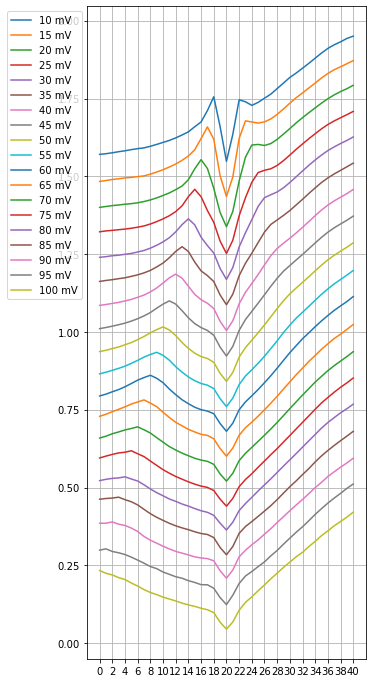

In [176]:
plotit(gaplist, True)

In [30]:
print(gapmap[:, :10])

[[63.812073 55.166595 48.336456 ... 45.87506  45.86566  45.88916 ]
 [63.635956 55.082848 48.31778  ... 45.874866 45.865845 45.887825]
 [61.671654 54.113136 48.070995 ... 45.874805 45.866108 45.88374 ]
 ...
 [53.16321  48.72114  46.368332 ... 45.864353 45.875984 45.880455]
 [52.46154  48.42635  46.306183 ... 45.865463 45.874928 45.88134 ]
 [51.349346 47.920338 46.191475 ... 45.86532  45.875164 45.880913]]


In [58]:
adjgapmap = gapmap[:, 13:]

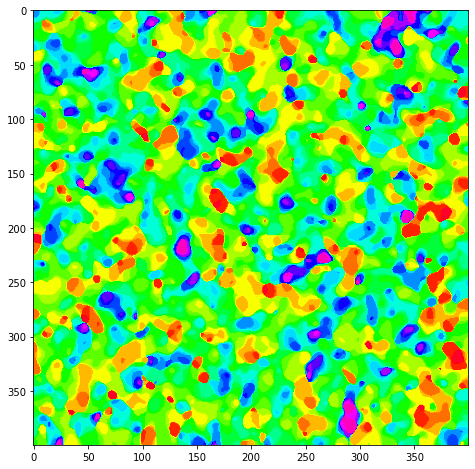

In [170]:
plt.figure(figsize = (8,8))
plt.imshow(adjgapmap, cmap = "gist_rainbow")

In [167]:
pickle.dump(adjgapmap, open(folder_name + "/GapMap6_25.pickle", "wb"))

In [65]:
print(np.shape(temp[0]))

(400, 400)


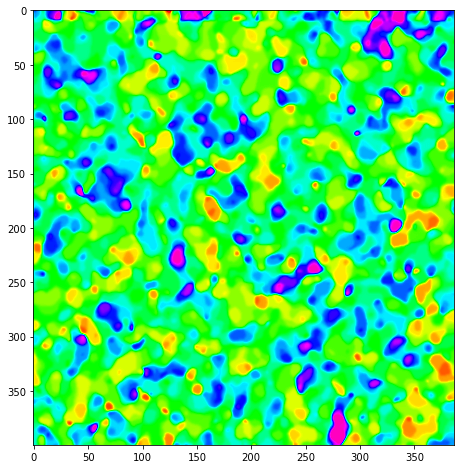

In [57]:
plt.figure(figsize = (8,8))
plt.imshow(gapmap[:, 13:], cmap = "gist_rainbow", vmin = 0, vmax = 100)

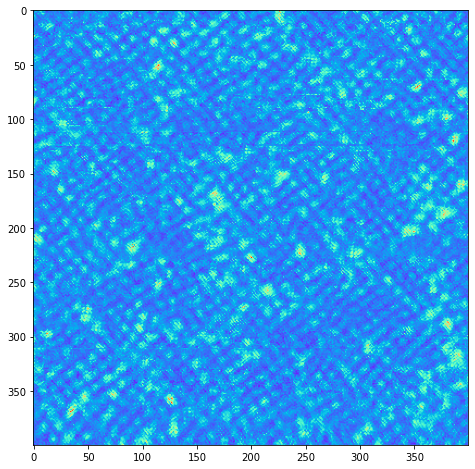

In [22]:
plt.figure(figsize = (8,8))
plt.imshow(gapmap, cmap = "rainbow")

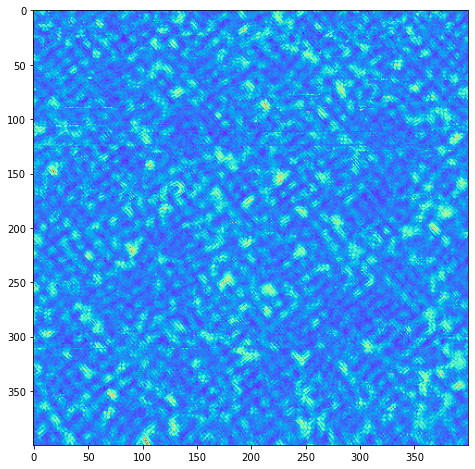

In [70]:
plt.figure(figsize = (8,8))
plt.imshow(nvl_modified[22, :, :], cmap = "rainbow")

In [13]:
print(count)

[  132.  5614. 20031. 33692. 42790. 28976. 17014.  7112.  2826.  1484.
   308.]


In [434]:
print(np.min(full_arealist[1]))

61.36106139053345


In [435]:
for i in range(len(full_arealist)):
    print(np.std(full_arealist[i]))

51.33970050598173
64.77966821001054
64.89182914039847
60.11716069246844
60.508200957907455
60.549810219349844
60.38651479965949
57.3313317177873
55.142893909129945
53.175099369048084
51.28610094067949
51.00697741261151
54.763011539551854
57.53180590039634


Text(0, 0.5, 'Area')

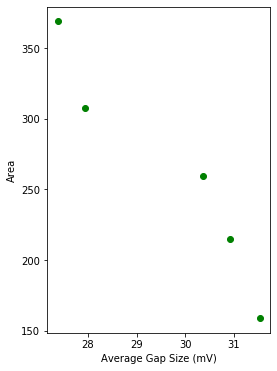

In [436]:
# going from area to gap method

gapmap_avg = np.zeros(5)
full_gapmap_list = [[] for x in range(5)] 
cg = np.zeros(5)

for i in range(dim):
    for j in range(dim):
        if (area_rank[i,j] == 1):
            gapmap_avg[0] = gapmap_avg[0] + gapmap[i,j]
            full_gapmap_list[0].append(gapmap[i,j])
            cg[0] = cg[0] + 1
        elif (area_rank[i,j] == 2):
            gapmap_avg[1] = gapmap_avg[1] + gapmap[i,j]
            full_gapmap_list[1].append(gapmap[i,j])
            cg[1] = cg[1] + 1
        elif (area_rank[i,j] == 3):
            gapmap_avg[2] = gapmap_avg[2] + gapmap[i,j]
            full_gapmap_list[2].append(gapmap[i,j])
            cg[2] = cg[2] + 1
        elif (area_rank[i,j] == 4):
            gapmap_avg[3] = gapmap_avg[3] + gapmap[i,j]
            full_gapmap_list[3].append(gapmap[i,j])
            cg[3] = cg[3] + 1
        elif (area_rank[i,j] == 5):
            gapmap_avg[4] = gapmap_avg[4] + gapmap[i,j]
            full_gapmap_list[4].append(gapmap[i,j])
            cg[4] = cg[4] + 1
        

fig = plt.figure(figsize = (4, 6))
if mat == 1:
    pix_size = 0.155103
elif mat == 3:
    pix_size = 0.171390
plt.scatter(np.divide(gapmap_avg, cg), np.divide(area_avg_per_group, count_area_avg), color = 'green')
plt.xlabel('Average Gap Size (mV)')
plt.ylabel('Area')
#plt.legend()

In [437]:
for i in range(len(full_gapmap_list)):
    print(len(full_gapmap_list[i]), np.std(full_gapmap_list[i]))

46408 11.672855
52248 12.006658
49670 11.666179
29790 10.335413
23637 10.512908


## Split Amplitudes

In [131]:
# "filtered" is what I use for the amplitude calculation, the others are for ampX and ampY
#filtered = pickle.load(open("Filter1abs.pickle", "rb"))
#filtered = pickle.load(open("IntegralOPT.pickle", "rb"))
filtered = nvl_modified[18, :, :]
# filteredX = pickle.load(open("xOPT10mV.pickle", "rb"))
# filteredY = pickle.load(open("yOPT10mV.pickle", "rb"))
filteredX = pickle.load(open("xUD10mV.pickle", "rb"))
filteredY = pickle.load(open("yUD10mV.pickle", "rb"))

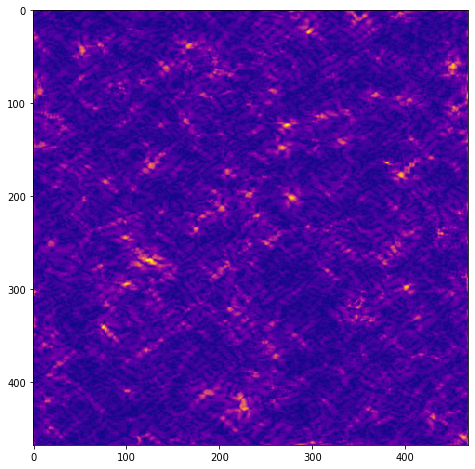

In [9]:
fig = plt.figure(figsize=(8,8))
combined = filteredX + filteredY
plt.imshow(combined, cmap = 'plasma')

In [15]:
def amp_calc(lst, percent):
    bot_percent = np.percentile(lst, percent)
    top_percent = np.percentile(lst, 100 - percent)
    bot = np.mean([x for x in lst if x <= bot_percent])
    top = np.mean([y for y in lst if y >= top_percent])
    return top - bot

In [132]:
# takes a long time to run

# here is how I calculate the amplitudes; it's a very brute force method where I go through all the points in a 
# particular cell, append their values to an array, and then find the max - min after collecting for one cell; then the
# process repeats for every single cell

# amp_ind is just my record of which points are in which cells so I don't have to go through the trouble a second time
amp = []
ampX = []
ampY = []
amp_ind = []
per = 20
for i in range(len(verticelist)):
    points_in_poly = inpolygon(verticelist[i])
    temp_collect = []
    temp_collectX = []
    temp_collectY = []
    temp_ind = []
    for j in range(len(points_in_poly)):
        if(points_in_poly[j]):
            row = math.floor(j/dim)
            col = j % dim
            temp_collect.append(filtered[row][col])
            temp_collectX.append(filteredX[row][col])
            temp_collectY.append(filteredY[row][col])
            temp_ind.append([row,col])
        
    if (len(temp_collect) < 1):
        amp.append(0)
    else:
        #amp.append(max(temp_collect) - min(temp_collect))
        amp.append(amp_calc(temp_collect, per))
    
    if (len(temp_collectX) < 1):
        ampX.append(0)
    else:
        #ampX.append(max(temp_collectX) - min(temp_collectX))
        ampX.append(amp_calc(temp_collectX, per))

    if (len(temp_collectY) < 1):
        ampY.append(0)
    else:
        #ampY.append(max(temp_collectY) - min(temp_collectY))
        ampY.append(amp_calc(temp_collectY, per))
    
    amp_ind.append(temp_ind)
    
#pickle.dump(amp, open(folder_name + "/AmpList.pickle", "wb"))
#pickle.dump(amp_ind, open(folder_name + "/AmpInd.pickle", "wb"))
# pickle.dump(ampX, open(folder_name + "/AmpXList.pickle", "wb"))
# pickle.dump(ampY, open(folder_name + "/AmpYList.pickle", "wb"))

# for percentile method
pickle.dump(amp, open(folder_name + "/P20AmpList.pickle", "wb"))
pickle.dump(ampX, open(folder_name + "/P20AmpXList.pickle", "wb"))
pickle.dump(ampY, open(folder_name + "/P20AmpYList.pickle", "wb"))

# Directional Dependence Plots

In [7]:
import pickle
ampX = pickle.load(open(folder_name + "/AmpXList.pickle", "rb"))
ampY = pickle.load(open(folder_name + "/AmpYList.pickle", "rb"))
gapmap = pickle.load(open(folder_name + "/GapMap6_25.pickle", "rb"))
revised = pickle.load(open(folder_name + "/Revised.pickle", "rb"))

In [10]:
# 10mV map
new_centers = pickle.load(open(folder_name + "/NewCenters.pickle", "rb"))
area = pickle.load(open(folder_name + "/AreaList.pickle", "rb"))
verticelist = pickle.load(open(folder_name + "/VerticeList.pickle", "rb"))
amp_ind = pickle.load(open(folder_name + "/AmpInd.pickle", "rb"))

In [97]:
# my gapmap
verticelist = pickle.load(open(folder_name + "/PGVerticeListAdj.pickle", "rb"))
area = pickle.load(open(folder_name + "/PGAreaListAdj.pickle", "rb"))
new_centers = pickle.load(open(folder_name + "/PGNewCentersAdj.pickle", "rb"))
amp_ind = pickle.load(open(folder_name + "/PGAmpIndAdj.pickle", "rb"))

In [ ]:
filteredX = pickle.load(open("xUD10mV.pickle", "rb"))
filteredY = pickle.load(open("yUD10mV.pickle", "rb"))

In [11]:
bound_dist_area = np.percentile(area,93)
dist_area = np.zeros((dim,dim))
dist_areax = np.ones((dim,dim)) * 10
dist_areay = np.ones((dim,dim)) * 10
dist_areaxy = np.ones((dim,dim)) * 10
for i in range(len(amp_ind)):
    for j in range(len(amp_ind[i])):
        x_ind = amp_ind[i][j][0]
        y_ind = amp_ind[i][j][1]
        x_dist = x_ind - new_centers[i][0]
        y_dist = y_ind - new_centers[i][1]
        dist = (x_dist**2  + y_dist**2)**(1/2)
        if area[i] > bound_dist_area:
            dist_area[x_ind, y_ind] = 10
        elif area[i] == 0:
            dist_area[x_ind, y_ind] = 0
        else:
            dist_area[x_ind, y_ind] = dist/(area[i])**(1/2)
            if y_dist == 0:
                dist_areax[x_ind, y_ind] = dist/(area[i])**(1/2)
            if x_dist == 0:
                dist_areay[x_ind, y_ind] = dist/(area[i])**(1/2)
            if x_dist == y_dist:
                dist_areaxy[x_ind, y_ind] = dist/(area[i])**(1/2)

In [12]:
def get_dist_avg_gap(gahh, dist_area, block10 = False):
    dist_avg_gap = []
    for i in range(len(amp_ind)):
        temp = {0.1: [], 0.2: [], 0.3: [], 0.4: [], 0.5: [], 0.6: [], 0.7: [], 0.8: []}
        for ind in amp_ind[i]:
            ii = ind[0]
            jj = ind[1]
            if block10:
                if dist_area[ii,jj] == 10:
                    continue
            if dist_area[ii,jj] < 0.9 and dist_area[ii,jj] >= 0.8:
                temp[0.8].append(gahh[ii, jj])
            if dist_area[ii,jj] < 0.8 and dist_area[ii,jj] >= 0.7:
                temp[0.7].append(gahh[ii, jj])
            if dist_area[ii,jj] < 0.7 and dist_area[ii,jj] >= 0.6:
                temp[0.6].append(gahh[ii, jj])
            if dist_area[ii,jj] < 0.6 and dist_area[ii,jj] >= 0.5:
                temp[0.5].append(gahh[ii, jj])
            if dist_area[ii,jj] < 0.5 and dist_area[ii,jj] >= 0.4:
                temp[0.4].append(gahh[ii, jj])
            if dist_area[ii,jj] < 0.4 and dist_area[ii,jj] >= 0.3:
                temp[0.3].append(gahh[ii, jj])
            if dist_area[ii,jj] < 0.3 and dist_area[ii,jj] >= 0.2:
                temp[0.2].append(gahh[ii, jj])
            if dist_area[ii,jj] < 0.2 and dist_area[ii,jj] >= 0:
                temp[0.1].append(gahh[ii, jj])
        temp2 = {0.1: -1, 0.2: -1, 0.3: -1, 0.4: -1, 0.5: -1, 0.6: -1, 0.7: -1, 0.8: -1}
        for hey in range(1,9):
            if (len(temp[hey/10]) > 0):
                temp2[hey/10] = np.mean(temp[hey/10])
            else:
                temp2[hey/10] = np.nan
        dist_avg_gap.append(temp2)
    return dist_avg_gap

In [100]:
revised_to_mv = 5*(20-revised)

In [101]:
dist_avg_gap = get_dist_avg_gap(revised_to_mv, dist_area)
dist_avg_gapx = get_dist_avg_gap(revised_to_mv, dist_areax, block10 = True)
dist_avg_gapy = get_dist_avg_gap(revised_to_mv, dist_areay, block10 = True)
dist_avg_gapxy = get_dist_avg_gap(revised_to_mv, dist_areaxy, block10 = True)

In [114]:
dist1 = []
dist5 = []
dist3 = []
use = dist_avg_gapy
for i in range(len(amp_ind)):
    dist1.append(use[i][0.1])
    dist5.append(use[i][0.5])
    dist3.append(use[i][0.3])

(array([189., 330., 202., 110.,  78.,  27.,   7.,   2.,   0.,  15.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

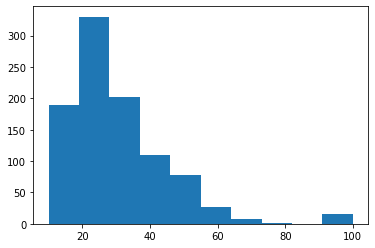

In [63]:
plt.hist(dist1)

In [10]:
ampX = np.array(ampX)
ampY = np.array(ampY)
subed = np.abs(ampX - ampY)

Text(0, 0.5, 'Center average gap (mV)')

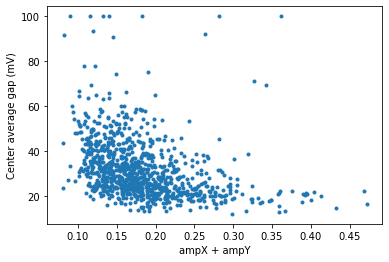

In [94]:
plt.scatter(ampX+ampY, dist1, marker = ".")
plt.xlabel("ampX + ampY")
plt.ylabel("Center average gap (mV)")
#plt.ylim(top = 60, bottom = -40)
#plt.ylim(top = 80)

In [115]:
import math
aghher = [0, 20, 25, 33, 40, 60]
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
record = np.zeros(len(amp_ind))
for i in range(len(amp_ind)):
    if not math.isnan(dist1[i]):
        if (dist1[i] > aghher[0] and dist1[i] <= aghher[1]):
            l1.append(use[i])
            record[i] = 1
        elif (dist1[i] > aghher[1] and dist1[i] <= aghher[2]):
            l2.append(use[i])
            record[i] = 2
        elif (dist1[i] > aghher[2] and dist1[i] <= aghher[3]):
            l3.append(use[i])
            record[i] = 3
        elif (dist1[i] > aghher[3] and dist1[i] <= aghher[4]):
            l4.append(use[i])
            record[i] = 4
        elif (dist1[i] > aghher[4] and dist1[i] <= aghher[5]):
            l5.append(use[i])
            record[i] = 5
    else:
        record[i] = 6

In [66]:
np.max(record)

6.0

In [79]:
print(len(l1),
      len(l2),
      len(l3),
      len(l4),
      len(l5))

426 138 163 111 98


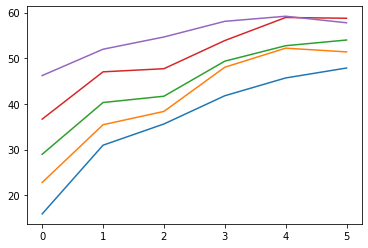

In [116]:
def avgdict(ll):
    col1 = []
    col2 = []
    col3 = []
    col4 = []
    col5 = []
    col6 = []
    for di in ll:
        col1.append(di[0.1])
        col2.append(di[0.2])
        col3.append(di[0.3])
        col4.append(di[0.4])
        col5.append(di[0.5])
        col6.append(di[0.6])
    return [np.nanmean(col1), np.nanmean(col2), np.nanmean(col3), np.nanmean(col4), np.nanmean(col5), np.nanmean(col6)]
al1 = avgdict(l1)
al2 = avgdict(l2)
al3 = avgdict(l3)
al4 = avgdict(l4)
al5 = avgdict(l5)

plt.plot(al1)
plt.plot(al2)
plt.plot(al3)
plt.plot(al4)
plt.plot(al5)
x = np.arange(0, 6)

In [109]:
al1x = avgdict(l1)

In [117]:
al1y = avgdict(l1)


In [113]:
al1xy = avgdict(l1)


In [105]:
al1 = avgdict(l1)

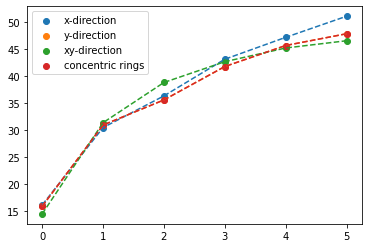

In [118]:
x = np.arange(0, 6)
plt.scatter(x, al1x, label = "x-direction")
plt.scatter(x, al1y, label = "y-direction")
plt.scatter(x, al1xy, label = "xy-direction")
plt.scatter(x, al1, label = "concentric rings")
plt.plot(x, al1x, linestyle = "--")
plt.plot(x, al1y, linestyle = "--")
plt.plot(x, al1xy, linestyle = "--")
plt.plot(x, al1, linestyle = "--")
plt.legend()

In [6]:
revised_to_mv = 5*(20-revised)

In [7]:
import numpy as np
avg_old_gap = []
avg_new_gap = []
for i in range(len(amp_ind)):
    old_temp = []
    new_temp = []
    for ind in amp_ind[i]:
        ii = ind[0]
        jj = ind[1]
        old_temp.append(gapmap[ii,jj])
        if revised[ii,jj] != 0:
            new_temp.append(revised_to_mv[ii,jj])
    if len(new_temp) == 0:
        avg_new_gap.append(0)
    else:
        avg_new_gap.append(np.mean(new_temp))
    if len(old_temp) == 0:
        avg_old_gap.append(0)
    else:
        avg_old_gap.append(np.mean(old_temp))

In [8]:
len(avg_old_gap)

1080

In [9]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(ampX, ampY, avg_old_gap, marker = '.')
# a + bx + cy + dx^2 + ey^2 fit
#ax.scatter(ampX, ampY, fit, marker = '*')
# a + bx + cy fit (62.0590949 - 88.49851886*ampX - 82.59636033*ampY)
#ax.scatter(ampX, ampY, fit2, marker = '^')


ax.set_xlabel('ampX')
ax.set_ylabel('ampY')
ax.set_zlabel('average gap (mV)')

plt.show()

Using matplotlib backend: Qt5Agg


In [20]:
np.min(ampX), np.max(ampX), np.min(ampY), np.max(ampY)

(0.0, 0.29177859402786016, 0.0, 0.2781026268350574)

Text(0.5, 1.0, 'Gap (mV) vs Sum of Amps')

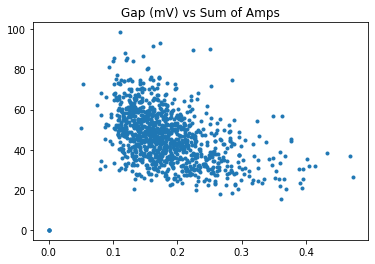

In [35]:
plt.scatter(np.array(ampX) + np.array(ampY), avg_old_gap, marker= ".")
plt.title("Gap (mV) vs Sum of Amps")

Text(0.5, 1.0, 'Gap (mV) vs Combined Amp Magnitude')

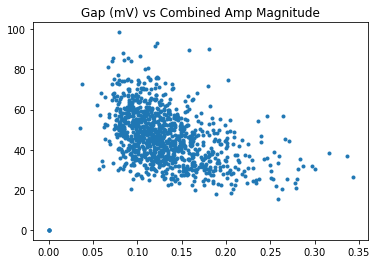

In [37]:
plt.scatter((np.array(ampX)**2 + np.array(ampY)**2)**(0.5), avg_old_gap, marker = ".")
plt.title("Gap (mV) vs Combined Amp Magnitude")

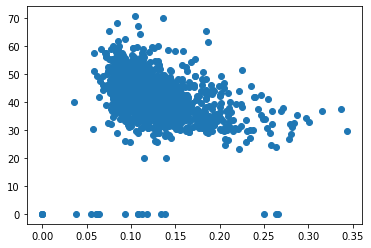

In [33]:
plt.scatter((np.array(ampX)**2 + np.array(ampY)**2)**(0.5), avg_new_gap)

In [21]:
transformed = np.zeros((300, 300))
for i in range(len(ampX)):
    transformed[int(ampX[i] * 1000), int(ampY[i] * 1000)] = avg_old_gap[i]

In [25]:
%matplotlib inline

Text(0.5, 0, 'AmpX')

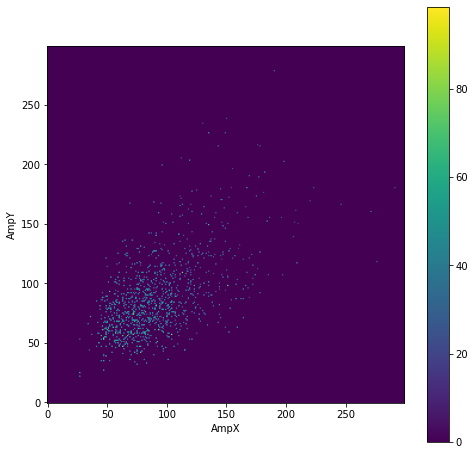

In [28]:
plt.figure(figsize=(8,8))
plt.imshow(transformed.T, origin = "lower")
plt.colorbar()
plt.ylabel("AmpY")
plt.xlabel("AmpX")

In [39]:
# col of ones, ampX, ampY, ampX^2, ampY^2
A = np.ones((len(ampX), 5))
A[:, 1] = ampX
A[:, 2] = ampY
A[:, 3] = np.array(ampX)**2
A[:, 4] = np.array(ampY)**2

In [67]:
A = np.ones((len(ampX), 4))
A[:, 1] = ampX
A[:, 2] = ampY
A[:, 3] = (np.array(ampX)**2 + np.array(ampY)**2)**(0.5)

In [68]:
A

array([[1.        , 0.15818724, 0.09988244, 0.18708208],
       [1.        , 0.07986819, 0.10967836, 0.13567708],
       [1.        , 0.05023552, 0.08941002, 0.10255613],
       ...,
       [1.        , 0.08124982, 0.08895308, 0.12047483],
       [1.        , 0.08684657, 0.06872559, 0.11074987],
       [1.        , 0.09075712, 0.07128983, 0.11540838]])

In [44]:
ampX = np.array(ampX)
ampY = np.array(ampY)

In [42]:
from scipy.linalg import lstsq

In [65]:
lstsq(A[:, :3], avg_new_gap)

(array([ 49.44177604, -27.4952134 , -61.20907768]),
 90215.6353445519,
 3,
 array([33.13512428,  1.38850312,  0.71885056]))

In [66]:
lstsq(A[:, :3], avg_old_gap)

(array([ 62.0590949 , -88.49851886, -82.59636033]),
 165181.30838538805,
 3,
 array([33.13512428,  1.38850312,  0.71885056]))

In [69]:
lstsq(A, avg_old_gap)

(array([  62.07225213, -157.13614741, -148.83505033,   94.08940428]),
 165136.89210271963,
 4,
 array([33.41251826,  1.96127906,  0.71890966,  0.04972577]))

In [63]:
fit2 = 62.0590949 - 88.49851886*ampX - 82.59636033*ampY

In [56]:
fit = 59.54665542 - 29.26463019*ampX - 91.2129162*ampY - 258.11799593*(ampX**2) + 35.07713206*(ampY**2)


In [2]:
otheramp_x = pickle.load(open("UD11_11/LocalXAmpdistlessthan600.pickle", "rb"))

Text(0.5, 0, 'X amplitude')

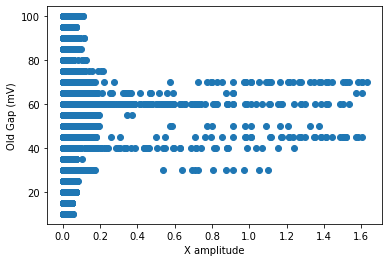

In [9]:
plt.scatter(otheramp_x.flatten(), gapmap.flatten())
plt.ylabel("Old Gap (mV)")
plt.xlabel("X amplitude")

In [21]:
aaa1 = np.percentile(otheramp_x,20)
aaa2 = np.percentile(otheramp_x,40)
aaa3 = np.percentile(otheramp_x,60)
aaa4 = np.percentile(otheramp_x,80)

In [22]:
ll1 = []
ll2 = []
ll3 = []
ll4 = []
ll5 = []
for i in range(50, 350):
    for j in range(50, 350):
        if otheramp_x[i,j] < aaa1:
            ll1.append(nvl_modified[:, i, j])
        elif otheramp_x[i,j] < aaa2:
            ll2.append(nvl_modified[:, i, j])
        elif otheramp_x[i,j] < aaa3:
            ll3.append(nvl_modified[:, i, j])
        elif otheramp_x[i,j] < aaa4:
            ll4.append(nvl_modified[:, i, j])
        else:
            ll5.append(nvl_modified[:, i, j])

TypeError: list indices must be integers or slices, not tuple

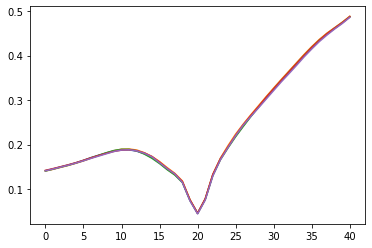

In [17]:
plt.plot(custom_mean(ll1))
plt.plot(custom_mean(ll2))
plt.plot(custom_mean(ll3))
plt.plot(custom_mean(ll4))
plt.plot(custom_mean(ll5))

In [133]:
# assign ranks again like I did earlier with area_rank
amp_rank = np.zeros((dim,dim))

# I just split it into even groups (unlike area, where I'm more concerned that large area cells will contain way more pixels
# and cause things to be imbalanced)
av = np.percentile(amp, 80)
bv = np.percentile(amp, 60)
cv = np.percentile(amp, 40)
dv = np.percentile(amp, 20)

amp_count = np.zeros(5)

for i in range(len(amp)):
    if (amp[i] >= av):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_rank[x_ind, y_ind] = 5
            amp_count[4] += 1
    elif (amp[i] >= bv):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_rank[x_ind, y_ind] = 4
            amp_count[3] += 1
    elif (amp[i] >= cv):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_rank[x_ind, y_ind] = 3
            amp_count[2] += 1
    elif (amp[i] >= dv):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_rank[x_ind, y_ind] = 2
            amp_count[1] += 1
    else:
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_rank[x_ind, y_ind] = 1
            amp_count[0] += 1

print('from smallest amplitude group to largest amplitude group', amp_count)

from smallest amplitude group to largest amplitude group [28258. 30600. 32108. 32663. 35647.]


In [63]:
print(av,bv,cv,dv)

0.25758576331815375 0.20919005896410897 0.18078558017499743 0.15338000452944212


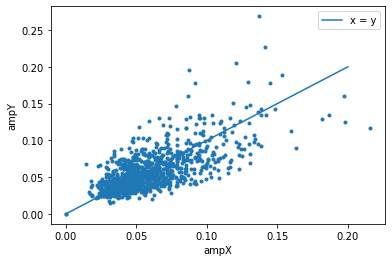

In [23]:
# some plots relating to ampX vs ampY analysis
# amp_subtracted = np.array(ampX) - np.array(ampY)

# plt.hist(ampX, bins = 20, alpha = 0.5, color = 'red', label = 'ampX')
# plt.hist(ampY, bins = 20, alpha = 0.5, color = 'blue', label = 'ampY')
# plt.legend()
# plt.show()

# from scipy.stats import norm

# (mu, sigma) = norm.fit(np.array(ampX) - np.array(ampY))
# n, bins, patches = plt.hist(amp_subtracted, bins = 50, density = 1)
# y = norm.pdf(bins, mu, sigma)
# l = plt.plot(bins, y, 'r--', linewidth=2)
# plt.title('Histogram of ampX - ampY fitted with gaussian')
# plt.show()

# plt.scatter(np.array(ampX) + np.array(ampY), np.array(amp), marker = '.')
# plt.xlabel('ampX + ampY')
# plt.ylabel('full amp')
# plt.show()
plt.scatter(np.array(ampX), np.array(ampY), marker = '.')
plt.plot([0, 0.2], [0, 0.2], label = "x = y")
plt.xlabel('ampX')
plt.ylabel('ampY')
plt.legend()
plt.show()

# plt.scatter(np.array(amp), np.array(area), marker = '.')
# plt.xlabel('Amplitude Value')
# plt.ylabel('Area Value')
# plt.ylim(0, 400)
# plt.show()

In [136]:
# here are my 10 groups for (ampX - ampY) values - these are the groups that don't follow a pattern in the figures I've shown

amp_spec1 = []
amp_spec2 = []
amp_spec3 = []
amp_spec4 = []
amp_spec5 = []
amp_spec6 = []
amp_spec7 = []
amp_spec8 = []
amp_spec9 = []
amp_spec10 = []

for i in range(len(amp_subtracted)):
    if (amp_subtracted[i] <= np.percentile(amp_subtracted, 10)):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_spec1.append(nvl_modified[:, x_ind, y_ind])
    elif (amp_subtracted[i] <= np.percentile(amp_subtracted, 20)):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_spec2.append(nvl_modified[:, x_ind, y_ind])
    elif (amp_subtracted[i] <= np.percentile(amp_subtracted, 30)):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_spec3.append(nvl_modified[:, x_ind, y_ind])
    elif (amp_subtracted[i] <= np.percentile(amp_subtracted, 40)):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_spec4.append(nvl_modified[:, x_ind, y_ind])
    elif (amp_subtracted[i] <= np.percentile(amp_subtracted, 50)):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_spec5.append(nvl_modified[:, x_ind, y_ind])
    elif (amp_subtracted[i] <= np.percentile(amp_subtracted, 60)):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_spec6.append(nvl_modified[:, x_ind, y_ind])
    elif (amp_subtracted[i] <= np.percentile(amp_subtracted, 70)):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_spec7.append(nvl_modified[:, x_ind, y_ind])
    elif (amp_subtracted[i] <= np.percentile(amp_subtracted, 80)):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_spec8.append(nvl_modified[:, x_ind, y_ind])
    elif (amp_subtracted[i] <= np.percentile(amp_subtracted, 90)):
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_spec9.append(nvl_modified[:, x_ind, y_ind])
    else:
        for j in range(len(amp_ind[i])):
            x_ind = amp_ind[i][j][0]
            y_ind = amp_ind[i][j][1]
            amp_spec10.append(nvl_modified[:, x_ind, y_ind])


In [137]:
# here are my groups for high-middle-low - the figure where it showed a big correlation between the sum of the amplitudes
# rather than the individual amplitudes themselves

amp_spec11 = []
amp_spec12 = []
amp_spec13 = []
amp_spec21 = []
amp_spec22 = []
amp_spec23 = []
amp_spec31 = []
amp_spec32 = []
amp_spec33 = []

first_third = 33
second_third = 66

x_1 = np.percentile(ampX, first_third)
x_2 = np.percentile(ampX, second_third)
y_1 = np.percentile(ampY, first_third)
y_2 = np.percentile(ampY, second_third)


for i in range(len(amp_subtracted)):
    if (ampX[i] <= x_1):
        if (ampY[i] <= y_1):
            for j in range(len(amp_ind[i])):
                x_ind = amp_ind[i][j][0]
                y_ind = amp_ind[i][j][1]
                amp_spec11.append(nvl_modified[:, x_ind, y_ind])
        elif (ampY[i] <= y_2):
            for j in range(len(amp_ind[i])):
                x_ind = amp_ind[i][j][0]
                y_ind = amp_ind[i][j][1]
                amp_spec12.append(nvl_modified[:, x_ind, y_ind])
        else:
            for j in range(len(amp_ind[i])):
                x_ind = amp_ind[i][j][0]
                y_ind = amp_ind[i][j][1]
                amp_spec13.append(nvl_modified[:, x_ind, y_ind])
                
    elif (ampX[i] <= x_2):
        if (ampY[i] <= y_1):
            for j in range(len(amp_ind[i])):
                x_ind = amp_ind[i][j][0]
                y_ind = amp_ind[i][j][1]
                amp_spec21.append(nvl_modified[:, x_ind, y_ind])
        elif (ampY[i] <= y_2):
            for j in range(len(amp_ind[i])):
                x_ind = amp_ind[i][j][0]
                y_ind = amp_ind[i][j][1]
                amp_spec22.append(nvl_modified[:, x_ind, y_ind])
        else:
            for j in range(len(amp_ind[i])):
                x_ind = amp_ind[i][j][0]
                y_ind = amp_ind[i][j][1]
                amp_spec23.append(nvl_modified[:, x_ind, y_ind])
                
    else:
        if (ampY[i] <= y_1):
            for j in range(len(amp_ind[i])):
                x_ind = amp_ind[i][j][0]
                y_ind = amp_ind[i][j][1]
                amp_spec31.append(nvl_modified[:, x_ind, y_ind])
        elif (ampY[i] <= y_2):
            for j in range(len(amp_ind[i])):
                x_ind = amp_ind[i][j][0]
                y_ind = amp_ind[i][j][1]
                amp_spec32.append(nvl_modified[:, x_ind, y_ind])
        else:
            for j in range(len(amp_ind[i])):
                x_ind = amp_ind[i][j][0]
                y_ind = amp_ind[i][j][1]
                amp_spec33.append(nvl_modified[:, x_ind, y_ind])

## Small/Large Area/Amp

In [138]:
# this combines the area and amplitude ranks; master_rank[i,j] = 41 means large area, small amp
master = pickle.load(open(folder_name + "/MasterRank.pickle", "rb"))

master_rank = np.zeros((dim, dim))

for i in range(dim):
    for j in range(dim):
        master_rank[i,j] = (master[i,j]//10)*10 + amp_rank[i,j]
        
pickle.dump(master_rank, open(folder_name + "/P20MasterRank.pickle", "wb"))

s_area_s_amp = []
s_area_l_amp = []
l_area_s_amp = []
l_area_l_amp = []

for i in range(dim):
    for j in range(dim):
        if (master_rank[i,j] == 11):
            s_area_s_amp.append(nvl_modified[:, i, j])
        if (master_rank[i,j] == 15):
            s_area_l_amp.append(nvl_modified[:, i, j])
        if (master_rank[i,j] == 41 or master_rank[i,j] == 51):
            l_area_s_amp.append(nvl_modified[:, i, j])
        if (master_rank[i,j] == 45 or master_rank[i,j] == 55):
            l_area_l_amp.append(nvl_modified[:, i, j])
                       
pickle.dump(s_area_s_amp, open(folder_name + "/P20SAreaSAmp.pickle", "wb"))
pickle.dump(s_area_l_amp, open(folder_name + "/P20SAreaLAmp.pickle", "wb"))
pickle.dump(l_area_s_amp, open(folder_name + "/P20LAreaSAmp.pickle", "wb"))
pickle.dump(l_area_l_amp, open(folder_name + "/P20LAreaLAmp.pickle", "wb"))

print(len(s_area_s_amp))
print(len(s_area_l_amp))
print(len(l_area_s_amp))
print(len(l_area_l_amp))

8484
4543
4091
12796


In [442]:
# found average gap size value for the large/small area/amp groups 

sasa_gap = []
sala_gap = []
lasa_gap = []
lala_gap = []

for i in range(dim):
    for j in range(dim):
        if (master_rank[i,j] == 11):
            sasa_gap.append(gapmap[i, j])
        if (master_rank[i,j] == 15):
            sala_gap.append(gapmap[i, j])
        if (master_rank[i,j] == 41 or master_rank[i,j] == 51):
            lasa_gap.append(gapmap[i, j])
        if (master_rank[i,j] == 45 or master_rank[i,j] == 55):
            lala_gap.append(gapmap[i, j])

print(np.mean(sasa_gap), np.mean(sala_gap), np.mean(lasa_gap), np.mean(lala_gap))
print(np.median(sasa_gap), np.median(sala_gap), np.median(lasa_gap), np.median(lala_gap))

36.633587 21.716288 32.25394 24.523531
34.965477 19.153643 31.061249 22.24025


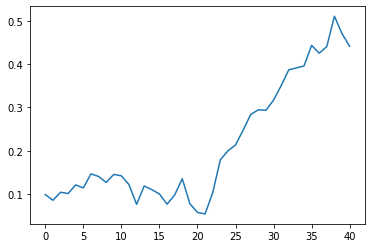

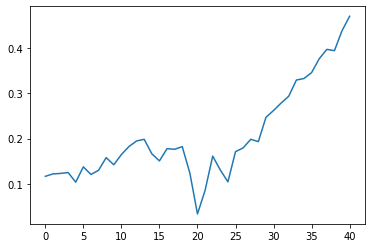

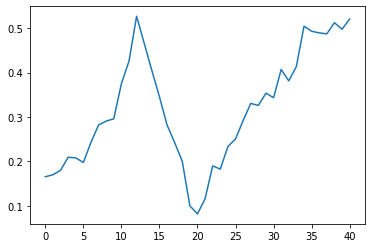

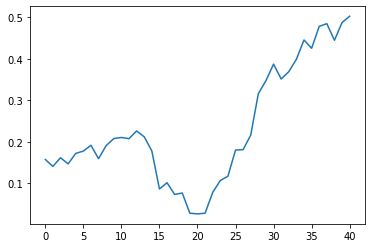

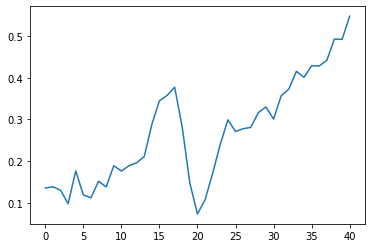

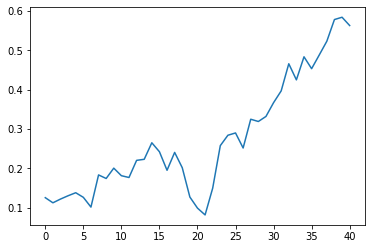

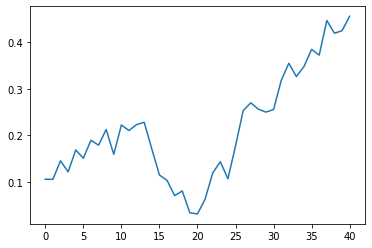

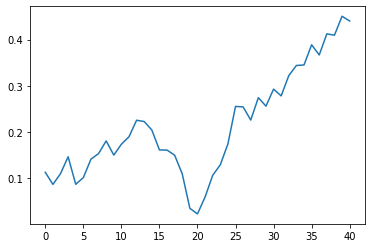

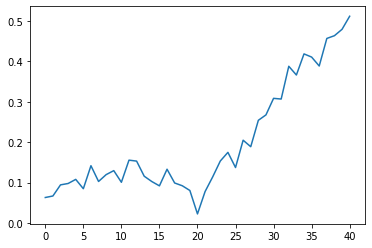

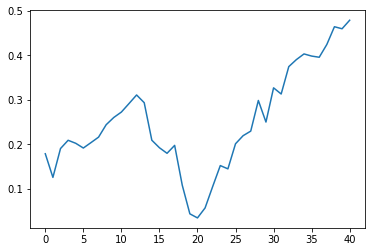

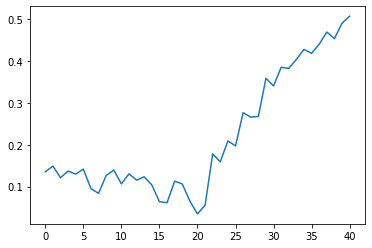

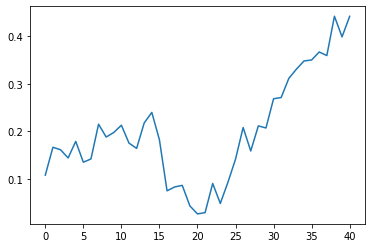

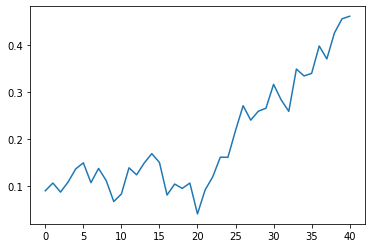

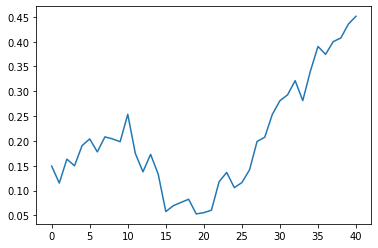

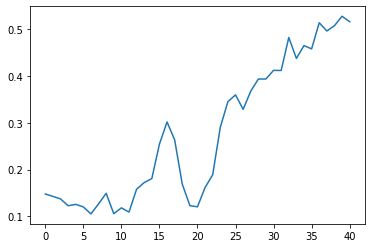

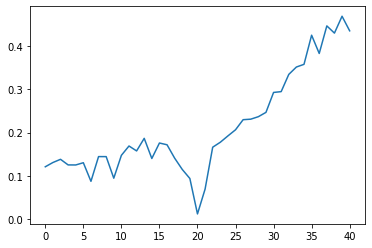

In [280]:
for i in range(0, 400, 20):
    for j in range(0, 400, 20):
        if (gapmap[i, j] < 20):
            plt.plot(nvl_modified[:, i, j])
            plt.show()

LALA: gap size = 15.336756


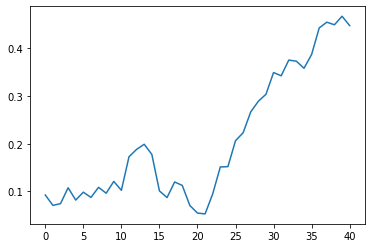

LALA: gap size = 18.924152


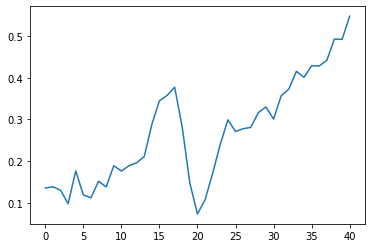

LALA: gap size = 19.818336


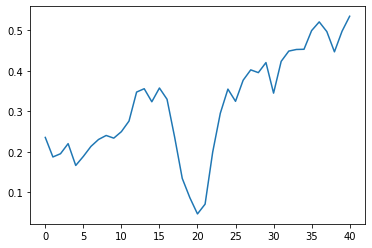

LALA: gap size = 16.731392


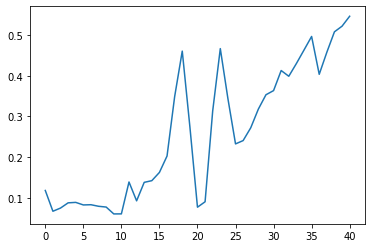

LALA: gap size = 15.992426


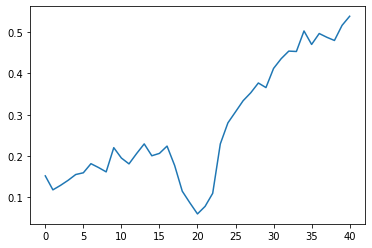

LALA: gap size = 19.656593


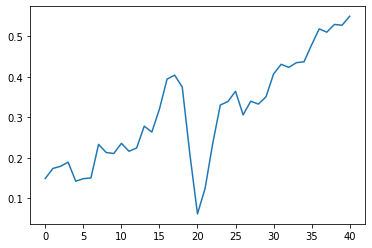

SALA: gap size = 19.776043


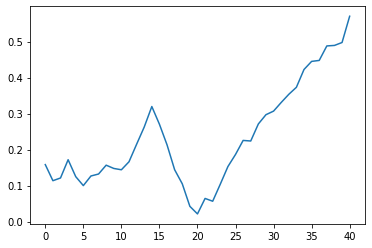

LALA: gap size = 18.503887


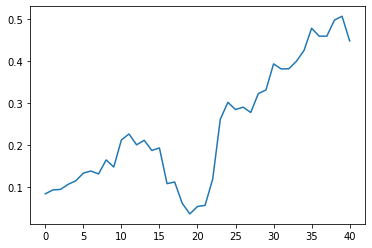

LALA: gap size = 18.245129


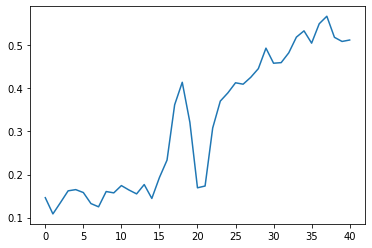

SALA: gap size = 15.428904


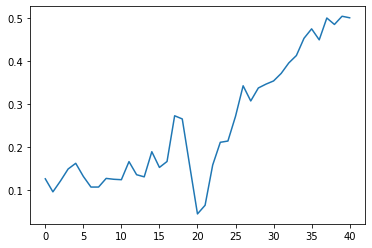

LALA: gap size = 13.227176


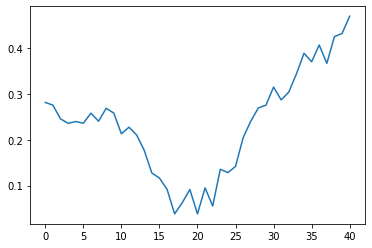

LALA: gap size = 15.081547


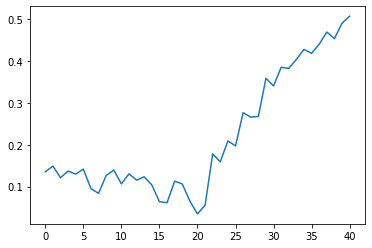

SALA: gap size = 11.707761


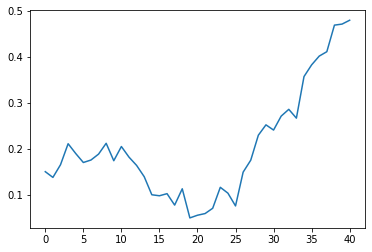

SALA: gap size = 15.084882


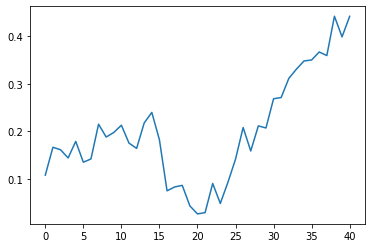

LALA: gap size = 15.022513


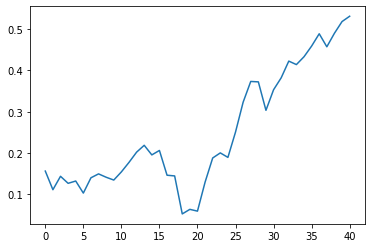

LALA: gap size = 19.41452


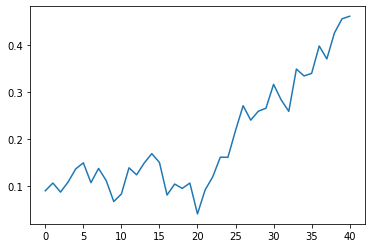

LALA: gap size = 15.344048


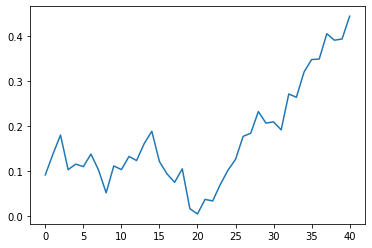

In [274]:
for i in range(0, 400, 10):
    for j in range(0, 400, 10):
        if (master_rank[i,j] == 15):
            if (gapmap[i, j] < 20):
                print('SALA: gap size =', gapmap[i, j])
                plt.plot(nvl_modified[:, i, j])
                plt.show()
        if (master_rank[i,j] == 45 or master_rank[i,j] == 55):
            if (gapmap[i, j] < 20):
                print('LALA: gap size =', gapmap[i, j] )
                plt.plot(nvl_modified[:, i, j])
                plt.show()

## Dist_Area

In [487]:
new_centers = []
for i in range(len(verticelist)):
    cent = centroid(verticelist[i])
    mini = 100
    for j in range(len(xtest)):
        dist = ((cent[0]-xtest[j])**2 + (cent[1]-ytest[j])**2)**(1/2)
        if dist < mini:
            mini = dist
            ind = [xtest[j], ytest[j]]
    new_centers.append(ind)
    
#pickle.dump(new_centers, open(folder_name + "/NewCenters.pickle", "wb"))

In [489]:
cent = centroid(verticelist[5])
mini = 100
for j in range(len(xtest)):
    dist = ((cent[0]-xtest[j])**2 + (cent[1]-ytest[j])**2)**(1/2)
    if dist < mini:
        mini = dist
        ind = [xtest[j], ytest[j]]
print(ind, dist)

[105.0, 330.0] 702.8463958675891


In [488]:
print(new_centers[5])

[3.0, 13.0]


In [483]:
def centroid(vertexes):
    _x_list = [vertex [0] for vertex in vertexes]
    _y_list = [vertex [1] for vertex in vertexes]
    _len = len(vertexes)
    _x = sum(_x_list) / _len
    _y = sum(_y_list) / _len
    return(_x, _y)

## Printing Quartiles or Mean/Var

In [33]:
# methods for printing quartiles/mean/var for each energy 

def print_quartiles(speclist):
    speclist = np.array(speclist)
    for a in range(41):
        print(str(np.percentile(speclist[:,a], 25)) + " " + str(np.percentile(speclist[:,a], 50)) + " " + str(np.percentile(speclist[:,a], 75)))
        
def print_meanvar(speclist, want_var):
    speclist = np.array(speclist)
    for a in range(41):
        print(np.mean(speclist[:, a]))
    if want_var:
        print()    
        for b in range(41):
            print(np.var(speclist[:, b]))

In [163]:
listofcurrentinterest = l_area_s_amp
#listofcurrentinterest = amp_spec33
# print_quartiles(np.array(listofcurrentinterest))
# print()
# so the first value printed is the average conductance at index 0, the second is avg conductance at index 1, etc
print_meanvar(listofcurrentinterest, False)

0.14290277763793213
0.14724153860251776
0.151343466415801
0.1559887760842642
0.16160491501365656
0.16739935659471306
0.17316768754321915
0.17951290031557662
0.1843309754815815
0.1894252883706108
0.19147552870918794
0.18852088104253278
0.1819310084370515
0.16692601753554945
0.1503661467125869
0.13224389958499944
0.11707324417391293
0.10436740251357841
0.08786869486905995
0.0578224676834952
0.03735954240563376
0.06193199626925219
0.10553495003742576
0.1396461491809033
0.168721968893611
0.19932076336911111
0.22874080444966355
0.2545058175172922
0.2781309166996469
0.2986017450475366
0.3170440535244776
0.3365006558624406
0.35508898513237264
0.3752118064201248
0.3946985841249085
0.41363224387168884
0.4313199209776463
0.44659844773726604
0.4602567244351158
0.4726643804173923
0.4870552222759617


## Difference in Slopes

In [308]:
super_slope = np.zeros((dim,dim))
outer_slope = np.zeros((dim,dim))
# super_start = 17
# super_end = 20
# outer_start = 5
# outer_end = 10
super_start = 20
super_end = 22
outer_start = 22
outer_end = 30

super_len = super_end - super_start + 1
outer_len = outer_end - outer_start + 1

for i in range(dim):
    for j in range(dim):
        super_result = np.polyfit(np.arange(1, super_len+1), nvl_modified[super_start:super_end+1, i, j], 1)
        super_slope[i,j] = super_result[0]
        outer_result = np.polyfit(np.arange(1, outer_len+1), nvl_modified[outer_start:outer_end+1, i, j], 1)
        outer_slope[i,j] = outer_result[0]

In [309]:
master_rank = pickle.load(open(folder_name + "/MasterRank.pickle", "rb"))
print(np.max(master_rank))

55.0


In [310]:
slopes = {'SASA_s': [], 'SASA_o': [], 'SALA_s': [], 'SALA_o': [], 'LASA_s': [], 'LASA_o': [], 'LALA_s': [], 'LALA_o': []}

for i in range(dim):
    for j in range(dim):
        if (master_rank[i,j] == 11):
            slopes['SASA_s'].append(super_slope[i,j])
            slopes['SASA_o'].append(outer_slope[i,j])
        if (master_rank[i,j] == 15):
            slopes['SALA_s'].append(super_slope[i,j])
            slopes['SALA_o'].append(outer_slope[i,j])
        if (master_rank[i,j] == 41 or master_rank[i,j] == 51):
            slopes['LASA_s'].append(super_slope[i,j])
            slopes['LASA_o'].append(outer_slope[i,j])
        if (master_rank[i,j] == 45 or master_rank[i,j] == 55):
            slopes['LALA_s'].append(super_slope[i,j])
            slopes['LALA_o'].append(outer_slope[i,j])
            
for key in slopes.keys():
    print(key, 'average is', np.mean(slopes[key]), '\n\nstandard deviation is', np.std(slopes[key]), '\n')

SASA_s average is 0.03492210962319464 

standard deviation is 0.023468246070481532 

SASA_o average is 0.0246230030483279 

standard deviation is 0.008314827015902946 

SALA_s average is 0.05348512060954936 

standard deviation is 0.03786046390510666 

SALA_o average is 0.02051238913512561 

standard deviation is 0.010699634247043779 

LASA_s average is 0.03602328056871547 

standard deviation is 0.02475830775391985 

LASA_o average is 0.026864517795064068 

standard deviation is 0.008571089903980247 

LALA_s average is 0.05859688625818621 

standard deviation is 0.04368206539544464 

LALA_o average is 0.020131850749584936 

standard deviation is 0.011496202111959711 



In [311]:
pickle.dump(super_slope, open(folder_name + "/SuperSlope.pickle", "wb"))
pickle.dump(outer_slope, open(folder_name + "/OuterSlope.pickle", "wb"))
pickle.dump(slopes, open(folder_name + "/SlopesByGroup.pickle", "wb"))

In [343]:
slopes = pickle.load(open("OPT11_10/SlopesByGroup.pickle", "rb"))

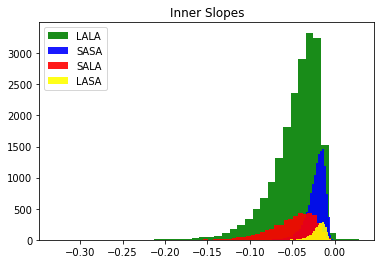

In [344]:
plt.hist(slopes['LALA_s'], bins = 40, alpha = .9, color = 'green', label = 'LALA')
plt.hist(slopes['SASA_s'], bins = 40, alpha = .9, color = 'blue', label = 'SASA')
plt.hist(slopes['SALA_s'], bins = 40, alpha = .9, color = 'red', label = 'SALA')
plt.hist(slopes['LASA_s'], bins = 40, alpha = .9, color = 'yellow', label = 'LASA')

plt.title('Inner Slopes')
plt.legend()
plt.show()

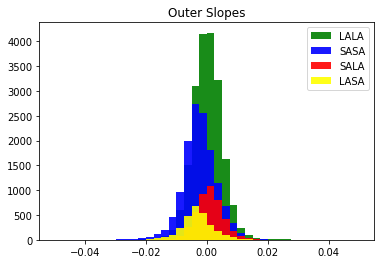

In [346]:
plt.hist(slopes['LALA_o'], bins = 40, alpha = .9, color = 'green', label = 'LALA', range = [-0.05, 0.05])
plt.hist(slopes['SASA_o'], bins = 40, alpha = .9, color = 'blue', label = 'SASA', range = [-0.05, 0.05])
plt.hist(slopes['SALA_o'], bins = 40, alpha = .9, color = 'red', label = 'SALA', range = [-0.05, 0.05])
plt.hist(slopes['LASA_o'], bins = 40, alpha = .9, color = 'yellow', label = 'LASA', range = [-0.05, 0.05])

plt.title('Outer Slopes')
plt.legend()
plt.show()

In [347]:
divided = {}
divided['SASA'] = np.divide(slopes['SASA_s'], slopes['SASA_o'])
divided['SALA'] = np.divide(slopes['SALA_s'], slopes['SALA_o'])
divided['LASA'] = np.divide(slopes['LASA_s'], slopes['LASA_o'])
divided['LALA'] = np.divide(slopes['LALA_s'], slopes['LALA_o'])

In [348]:
print(np.percentile(divided['LALA'], [10, 25, 50, 75, 90]))
print(np.percentile(divided['SALA'], [10, 25, 50, 75, 90]))
print(np.percentile(divided['LASA'], [10, 25, 50, 75, 90]))
print(np.percentile(divided['SASA'], [10, 25, 50, 75, 90]))

[-44.79501213 -16.92672256  -2.407053    10.68576467  35.56491569]
[-51.05673692 -21.43350454  -7.2700493   10.52509988  40.15891902]
[-9.36157137  0.72752598  2.86097153  6.32472739 14.44577211]
[-14.31024638  -3.8581049    2.44137532   6.24632488  16.18931394]
